In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class TicTacToe:
    def __init__(self, size=4):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)  
        self.winning_length = 3 if size == 4 else 4  

    def is_winner(self, player):
        """Check if the player has won."""
        board = self.board

        for i in range(self.size):
            if np.all(board[i, :] == player) or np.all(board[:, i] == player):
                return True

        if np.all(np.diag(board) == player) or np.all(np.diag(np.fliplr(board)) == player):
            return True

        return False

    def is_draw(self):
        """Check if the game is a draw."""
        return np.all(self.board != 0)

    def available_moves(self):
        """Return a list of available moves (row, col)."""
        return list(zip(*np.where(self.board == 0)))

    def make_move(self, row, col, player):
        """Make a move on the board."""
        self.board[row, col] = player

    def reset(self):
        """Reset the board."""
        self.board = np.zeros((self.size, self.size), dtype=int)


In [5]:
class DPAgent:
    def __init__(self, size=4):
        self.size = size
        self.states_value = defaultdict(float) 
        self.winning_length = 3 if size == 4 else 4 

    def get_board_tuple(self, board):
        return tuple(map(tuple, board))

    def alpha_beta_value_iteration(self, game, player, alpha=-float('inf'), beta=float('inf')):
        """Using Alpha-Beta Pruning."""
        board_tuple = self.get_board_tuple(game.board)
        
        if board_tuple in self.states_value:
            return self.states_value[board_tuple]

        if game.is_winner(1):
            self.states_value[board_tuple] = 1 
            return 1
        elif game.is_winner(-1):
            self.states_value[board_tuple] = -1 
            return -1
        elif game.is_draw():
            self.states_value[board_tuple] = 0  
            return 0

        available_moves = game.available_moves()
        if player == 1:
            max_value = -float('inf')
            for move in available_moves:
                row, col = move
                game.make_move(row, col, player)
                max_value = max(max_value, self.alpha_beta_value_iteration(game, -player, alpha, beta))
                game.make_move(row, col, 0)  # Undo move
                alpha = max(alpha, max_value)
                if beta <= alpha:
                    break 
            self.states_value[board_tuple] = max_value
            return max_value
        else:
            min_value = float('inf')
            for move in available_moves:
                row, col = move
                game.make_move(row, col, player)
                min_value = min(min_value, self.alpha_beta_value_iteration(game, -player, alpha, beta))
                game.make_move(row, col, 0)  
                beta = min(beta, min_value)
                if beta <= alpha:
                    break 
            self.states_value[board_tuple] = min_value
            return min_value

    def choose_move(self, game, player):
        """Choose best move"""
        available_moves = game.available_moves()
        best_move = None
        if player == 1:
            best_value = -float('inf')
            for move in available_moves:
                row, col = move
                game.make_move(row, col, player)
                move_value = self.alpha_beta_value_iteration(game, -player)
                game.make_move(row, col, 0)  # Undo move
                if move_value > best_value:
                    best_value = move_value
                    best_move = move
        else:
            best_value = float('inf')
            for move in available_moves:
                row, col = move
                game.make_move(row, col, player)
                move_value = self.alpha_beta_value_iteration(game, -player)
                game.make_move(row, col, 0)  # Undo move
                if move_value < best_value:
                    best_value = move_value
                    best_move = move
        return best_move


In [10]:
def simulate_games(size=4, num_games=1000):
    game = TicTacToe(size)
    agent = DPAgent(size)
    x_wins, o_wins, draws = 0, 0, 0

    for _ in range(num_games):
        game.reset()
        agent.alpha_beta_value_iteration(game, 1)  # Thực hiện Alpha-Beta Pruning cho X
        player = 1
        while True:
            move = agent.choose_move(game, player)
            if move:
                game.make_move(move[0], move[1], player)
                if game.is_winner(player):
                    if player == 1:
                        x_wins += 1
                    else:
                        o_wins += 1
                    break
                elif game.is_draw():
                    draws += 1
                    break
                player = -player  # Đổi lượt người chơi

    return x_wins, o_wins, draws


In [11]:

def plot_win_rate(x_wins, o_wins, draws, num_games):
    x_win_rate = x_wins / num_games
    o_win_rate = o_wins / num_games
    draw_rate = draws / num_games

    labels = ['X Wins', 'O Wins', 'Draws']
    rates = [x_win_rate, o_win_rate, draw_rate]

    plt.bar(labels, rates, color=['blue', 'orange', 'green'])
    plt.ylabel('Win Rate')
    plt.title('Win Rate of DP Agent in Tic Tac Toe')
    plt.show()

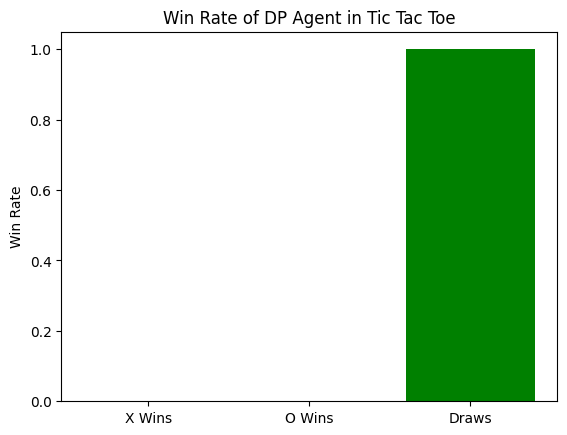

In [15]:
x_wins, o_wins, draws = simulate_games(size=4, num_games=1000)
plot_win_rate(x_wins, o_wins, draws, num_games=1000)

In [16]:
x_wins, o_wins, draws = simulate_games(size=5, num_games=1000)
plot_win_rate(x_wins, o_wins, draws, num_games=1000)